<a href="https://colab.research.google.com/github/roymuli/Africa-GDP-Population-Analysis/blob/main/BANK_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Introduction**

## a. Libraries

In [1]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

## b. Read file

In [2]:
file_path ='/content/drive/MyDrive/bank_transactions (1).csv/bank_transactions.csv' # use pandas to read csv file

In [3]:
df = pd.read_csv(file_path)

In [4]:
# overview of dataset
df.head(4)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,"17,819.05",2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,"2,270.69",2/8/16,141858,"27,999.00"
2,T3,C4417068,26/11/96,F,MUMBAI,"17,874.44",2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,"866,503.21",2/8/16,142714,"2,060.00"


In [5]:
df.tail(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,"221,757.06",18/9/16,183313,770.00
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,"10,117.87",18/9/16,184706,"1,000.00"
1048566,T1048567,C8337524,5/3/84,M,PUNE,"75,734.42",18/9/16,181222,"1,166.00"


From the dataset overview above;
- The first transaction is T1 and the last transaction is T408797
- the last transaction is null


## c. Eyeballing

In [6]:
# rows and columns
row, columns = df.shape
Rows = df.shape[0]
Columns = df.shape[1]
print(f'Rows: {Rows}\nColumns: {Columns}')

Rows: 1048567
Columns: 9


In [7]:
#see the columns
df.columns.to_list()

['TransactionID',
 'CustomerID',
 'CustomerDOB',
 'CustGender',
 'CustLocation',
 'CustAccountBalance',
 'TransactionDate',
 'TransactionTime',
 'TransactionAmount (INR)']

- TransactionID is a unique transaction identifier
- CustomerID is a unique customers for they associate transactions with specic individuals
- CustomerDOB helps in calculating customer age for dempgraphic analysis & segmentation
- CustLocation gives geographical location of customers
- CustAccountBalance for financial analysis and spending habits
- TransactionDate identifies trends over time
- TransactionTime for time series analysis
TransactionAount (INR) transaction amount im Indian Rupees

# **2. Data cleaning and preprocessing**

In [8]:
# show datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


- Transaction date need to be changed to datetime object


In [9]:
# Datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

#df['Year'] = df['CustomerDOB'].dt.year



In [10]:
#confirm dtypes again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-null  object        
 1   CustomerID               1048567 non-null  object        
 2   CustomerDOB              1045170 non-null  datetime64[ns]
 3   CustGender               1047467 non-null  object        
 4   CustLocation             1048416 non-null  object        
 5   CustAccountBalance       1046198 non-null  float64       
 6   TransactionDate          1048567 non-null  datetime64[ns]
 7   TransactionTime          1048567 non-null  int64         
 8   TransactionAmount (INR)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


In [11]:
df.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,"17,819.05",2016-02-08,143207,25.00
1,T2,C2142763,2057-04-04,M,JHAJJAR,"2,270.69",2016-02-08,141858,"27,999.00"
2,T3,C4417068,1996-11-26,F,MUMBAI,"17,874.44",2016-02-08,142712,459.00


In [12]:
# check missing values
df.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


We have missing values in

                          - Customer gender
                          - customer location
                          - Customer account balance
                          - Customer date of birth
For customer date of birth, we can create new column of customer age, and replace the missing values with mean

Again, with no names in the dataset, when have nothing we can use to help fill the missing customer gender, so is location
We can also use the mean of account balances to fill the misssing values

In [13]:
# handle missing values
# 1. Customer date of birth

max_date = df['TransactionDate'].max().year # get the maximum transaction date
min_date = df['CustomerDOB'].min().year
df['Age'] = max_date - df['CustomerDOB'].dt.year
print(max_date, min_date)

2016 1800


From the overview above, it seems age needs to be treated for;

- we have negative ages
- we have very small minimum age

<Axes: >

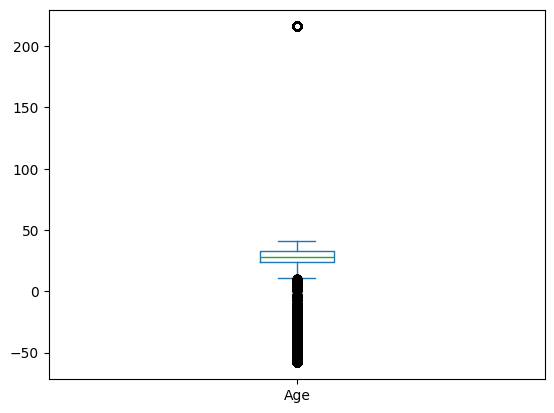

In [14]:
df['Age'].plot(kind = 'box')

The box plot above shows that we have outliers for attribute age

In [15]:
df.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,"17,819.05",2016-02-08,143207,25.00,22.00
1,T2,C2142763,2057-04-04,M,JHAJJAR,"2,270.69",2016-02-08,141858,"27,999.00",-41.00
2,T3,C4417068,1996-11-26,F,MUMBAI,"17,874.44",2016-02-08,142712,459.00,20.00
3,T4,C5342380,2073-09-14,F,MUMBAI,"866,503.21",2016-02-08,142714,"2,060.00",-57.00
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,"6,714.43",2016-02-08,181156,"1,762.50",28.00
5,T6,C1536588,2072-08-10,F,ITANAGAR,"53,609.20",2016-02-08,173940,676.00,-56.00
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.00,24.00
7,T8,C1220223,1982-01-27,M,MUMBAI,"95,075.54",2016-02-08,170537,148.00,34.00
8,T9,C8536061,1988-04-19,F,GURGAON,"14,906.96",2016-02-08,192825,833.00,28.00
9,T10,C6638934,1984-06-22,M,MUMBAI,"4,279.22",2016-02-08,192446,289.11,32.00


In [16]:
# handle age
df[df['Age'] <0][:10]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
1,T2,C2142763,2057-04-04,M,JHAJJAR,"2,270.69",2016-02-08,141858,"27,999.00",-41.00
3,T4,C5342380,2073-09-14,F,MUMBAI,"866,503.21",2016-02-08,142714,"2,060.00",-57.00
5,T6,C1536588,2072-08-10,F,ITANAGAR,"53,609.20",2016-02-08,173940,676.00,-56.00
15,T16,C8334633,2068-10-07,F,NEW DELHI,"1,283.12",2016-01-08,125725,250.00,-52.00
30,T31,C7648712,2067-01-21,F,NEW DELHI,"298,461.05",2016-03-08,160642,500.00,-51.00
51,T52,C6637047,2066-07-25,M,PUNE,"9,956.49",2016-05-08,133141,145.00,-50.00
79,T80,C6612422,2067-05-25,M,DELHI,"257,966.29",2016-01-08,204252,195.64,-51.00
80,T81,C8342660,2067-04-05,M,DUBAI,"6,190.71",2016-01-08,210610,878.00,-51.00
87,T88,C7918237,2074-03-09,M,JAMMU,"23,302.14",2016-06-08,122039,"2,200.00",-58.00
93,T94,C5232732,2072-04-28,M,NEW DELHI,"7,330.62",2016-06-08,170022,"2,813.62",-56.00


In [17]:
#add = lambda x,y: x+y
#print(add(4,5))

In [18]:
replac = lambda x: x.replace(year=x.year-100) if x.year > max_date else x
df['CustomerDOB'] = df['CustomerDOB'].apply(replac)

In [19]:
df.head(3)


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,"17,819.05",2016-02-08,143207,25.00,22.00
1,T2,C2142763,1957-04-04,M,JHAJJAR,"2,270.69",2016-02-08,141858,"27,999.00",-41.00
2,T3,C4417068,1996-11-26,F,MUMBAI,"17,874.44",2016-02-08,142712,459.00,20.00


In [20]:
df['Age'] = max_date - df['CustomerDOB'].dt.year

In [21]:
df.head(2)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,"17,819.05",2016-02-08,143207,25.00,22.00
1,T2,C2142763,1957-04-04,M,JHAJJAR,"2,270.69",2016-02-08,141858,"27,999.00",59.00


<Axes: >

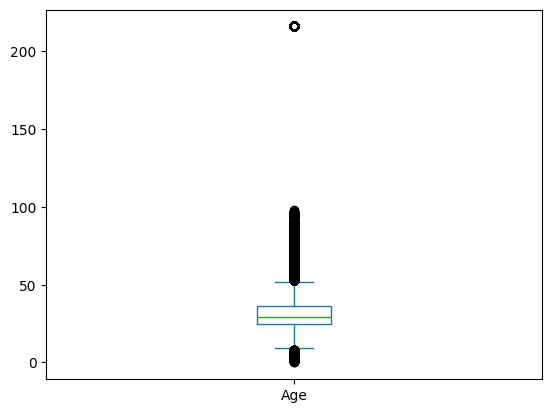

In [22]:
df['Age'].plot(kind='box')

In [23]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['CustAccountBalance', 'TransactionTime', 'TransactionAmount (INR)',
       'Age'],
      dtype='object')

It appears that we have outliers, we first treat them so that we can handle missing values, for instance replace missing age values with mean age

In [24]:
#identify outliers for the numerical values
numerics = df.select_dtypes(include=['float64', 'int64']).columns

#calculate IQR
Q1 = df[numerics].quantile(0.25)
Q3 = df[numerics].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 - 1.5*IQR
outliers = (df[numerics]<lower_bound)|(df[numerics]>upper_bound)
print(outliers.sum())

CustAccountBalance         1046198
TransactionTime             973372
TransactionAmount (INR)    1048567
Age                        1034561
dtype: int64


In [25]:
#treat outliers by capping
#for col in numerics:
 # df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

In [26]:
df['Age'].describe()

,Age
count,"1,045,170.00"
mean,41.18
std,42.97
min,0.00
25%,25.00
50%,29.00
75%,36.00
max,216.00


In [27]:
df.loc[df['Age']>100, 'Age']=100

In [28]:
df['Age'].describe()

,Age
count,"1,045,170.00"
mean,34.82
std,17.87
min,0.00
25%,25.00
50%,29.00
75%,36.00
max,100.00


In [29]:
#check missing values in age
df['Age'].isna().sum()

3397

In [30]:
#fill missing ages with mean
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [31]:
df.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0
Age,0


In [32]:
#drop customerDOB column
del df['CustomerDOB']

In [33]:
# check the best solution for treating missing values in account balances
df['CustAccountBalance'].describe()

,CustAccountBalance
count,"1,046,198.00"
mean,"115,403.54"
std,"846,485.38"
min,0.00
25%,"4,721.76"
50%,"16,792.18"
75%,"57,657.36"
max,"115,035,495.10"


From the overview above, we have very high variability in the account balances and therefore the best solution for the missing values is dropping them

Similarly, we dont have alternatives for missing values in gender and location. So we drop them

In [34]:
df = df.dropna()

In [35]:
#confirm if there null values
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0
Age,0


# **3. Exploratory Data Analysis (EDA)**

## a. Summmary statistics

In [36]:
df.head(3)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,F,JAMSHEDPUR,"17,819.05",2016-02-08,143207,25.00,22.00
1,T2,C2142763,M,JHAJJAR,"2,270.69",2016-02-08,141858,"27,999.00",59.00
2,T3,C4417068,F,MUMBAI,"17,874.44",2016-02-08,142712,459.00,20.00


In [37]:
# Datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [38]:
#summarize key statistics for age, customer balance, transaction time, and transaction amount
df.describe()

,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
count,"1,044,947.00",1044947,"1,044,947.00","1,044,947.00","1,044,947.00"
mean,"115,498.19",2016-07-25 19:43:08.186769408,"157,100.15","1,572.71",34.76
min,0.00,2016-01-08 00:00:00,0.00,0.00,0.00
25%,"4,735.65",2016-06-09 00:00:00,"124,033.00",161.00,25.00
50%,"16,817.13",2016-08-20 00:00:00,"164,236.00",459.52,29.00
75%,"57,704.96",2016-09-09 00:00:00,"200,016.00","1,200.00",36.00
max,"115,035,495.10",2016-12-09 00:00:00,"235,959.00","1,560,034.99",100.00
std,"846,977.38",NaN,"51,266.07","6,570.34",17.74


**Summary**

**i) CustAccountBalance**
- Minimum customer account balance is 0
- Maximum account balance is 115,035,495.10
- 25% of the customers have account balance of 4,735 and below
- The median (50%) is 16, 817.13, meaning 50% of the customers have 16.8k or below in their accounts
- 75% of the customers have 57.7k or less in their accounts
- The mean is 115.5k while the std is 846,977.38 showing that there is a significant variability between the accounts balances

**ii)Transaction time**

- minimum transaction time is 0 seconds
- Maximum time of transaction is 235,959 seconds
- 25% of the customers took 124,033 seconds or less to carry out transactions
- 50% of the customers took 164,236 seconds or less to transact
- 75% of the customers took 200,016 seconds or les to transact
- These customers took on average 157,100.15 seconds to transact
- The std is 51,266.07 indicating some significant level of variability between the transaction time

**iii) Transaction amount**

- Minimum transaction amount was 0.0 rupees
- Maximum transaction amount was 1,560,034.99 rupees
- 25% of the customers transacted 161 rupees or below
- 50% of these customers transacted 459.52 rupees or less
- 75% of the customers transacted 1,200.00 rupees or below
- The average transaction amount for all these customers was 1,572.71 rupees
- Std was 6,570.34 which is relatively a high figure showing that there is a huge variation between the transaction amounts across all the customers

iv) **Age**
- Minimum age was 0 years
- Maximum age was 216 years but it was capped at 100 years to help reduce extreme values
- 25% of the customers were aged 25 years or below
- 50% of the customers were aged upto 29 years
- 75% of the total customers were aged 36 years and below
- The mean of customer ages was 34.76 years
- Std was 17,74 indicating that the variability of the ages dropped significantly upon sorting extreme values of ages

## b. Correlation Analysis

In [48]:
# investigate the relationship between the numerical values

numerical_values = df.select_dtypes(include=['float64', 'int64']).columns # to select all the numerical values of the dataset

correlation_matrix = df[numerical_values].corr()

# use correlatoon heatmap to show the correlation
#plt.figure(figsize=(8,6))
#sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
#plt.title('Correlation Heatmap')
#plt.show()
correlation_matrix

,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age
CustAccountBalance,1.00,-0.00,0.06,0.09
TransactionTime,-0.00,1.00,0.01,-0.02
TransactionAmount (INR),0.06,0.01,1.00,0.11
Age,0.09,-0.02,0.11,1.00


**Analysis of correlation results**


Account Balance vs Transaction Amount

- The correlation coefficient was 0.063
- It indicated that there a weak but positive relationship between the account balances and the transanction amounts of the customers

Account Balance and Age

- The correlation coefficient is 0.094
- It indicated that there a weak but positive correlation between customers' account balances and their age

Transaction time
- The correlation coefficient of transaction time and customer balance is -0.0041, showing weak and negative relationship
- The coefficient of transaction time and transaction amount is 0.0079, showing a positive and weak relationship
- Coeffocient between transaction time and age is -0.022, showing a negative and weak relationship between these two attributes
-**NOTE:** It appears that there is almost no relationship bwtween transaction time with age, transaction amount and account balance, subject to further analysis

Transaction Amount vs Age

- The correlation coefficient is 0.11
- It means that there is a weak positive corelatoon between the amounts a customer transacts and their age